In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from PIL import Image
import cv2
import os
from skimage.measure import compare_ssim,compare_psnr

In [2]:
def show_data(x_in, pre_in):
    mean = np.mean(x_in)
    std = np.std(x_in)
    Max = np.max(x_in)
    Min = np.min(x_in)
    dtype = x_in.dtype
    
    print(pre_in + ' shape: ' + str(x_in.shape) + ' , type: ' + str(dtype) + ' , mean = ' + str(mean) 
          + ' , std = ' + str(std) + ' , Max = ' + str(Max) + ' , Min = ' + str(Min))

In [3]:
def trans_JPEG(data_in, QP):
    tmpu8=data_in.astype(np.uint8)
    im = Image.fromarray(tmpu8)
    im.save("./tmp.jpeg",quality=QP)
    size=os.path.getsize("./tmp.jpeg")
    tim=Image.open("./tmp.jpeg")
    tima=np.array(tim)
    rdfu8=tima.astype(np.uint8)
    return rdfu8, size

In [4]:
def kd_fname(i_in):
    rname = '/IMG000' + str(i_in) + '.dib'
    if i_in >9: rname = '/IMG00' + str(i_in) + '.dib'
        
    return rname

In [5]:
def read_KD_img(pref, i_img):
    fname = pref + kd_fname(i_img) 
    tim = cv2.imread(fname)
    npix = tim.shape[0]*tim.shape[1]
    assert(npix == 2048*3072)
    if tim.shape[0]!=2048: tim = np.rot90(tim,k=1)
        
    data_o = np.zeros([2048,3072,3])
    data_o[...,0] = tim[...,2]
    data_o[...,1] = tim[...,1]
    data_o[...,2] = tim[...,0]
    data_o=data_o.astype(np.uint8)
    
    return data_o

In [6]:
def compare_metrics(data0,data1): #data0: label
    #size = len(data0.flatten())*8
    psnr =compare_psnr(data1, data0)
    ssim =compare_ssim(data1, data0, multichannel=True)
    return psnr, ssim

In [7]:
def compare_concise(pref, idx, QP):
    img_o = read_KD_img(pref, idx)
    show_data(img_o, '  img_o')
    
    img_j, size_j = trans_JPEG(img_o, QP)
    show_data(img_j, '  img_j')
    print('size_j= ' + str(size_j))
    
    psnr, ssim = compare_metrics(img_o,img_j)
    size_o = len(img_o.flatten())
    ratio = float(size_o)/float(size_j)

    print('  psnr= ' + str(psnr) + ' ; ssim= ' + str(ssim))
    print('  size_o= ' + str(size_o))
    print('  ratio= ' + str(ratio))
    
    plt.figure(figsize=(16, 18))

    plt.subplot(1,2,1)
    plt.imshow(img_o)
    
    plt.subplot(1,2,2)    
    plt.imshow(img_j)
    plt.title('PSNR= %.2f, SSIM= %.4f'%(psnr,ssim))
    plt.show()

In [8]:
pref = '../Kodak_examples_uncompressed'

## 1

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 106.24156596925523 , std = 55.50128436770011 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 106.26775487263997 , std = 55.46853826688603 , Max = 255 , Min = 0
size_j= 1210717
  psnr= 39.741098696534515 ; ssim= 0.9475987880656547
  size_o= 18874368
  ratio= 15.589413545857537


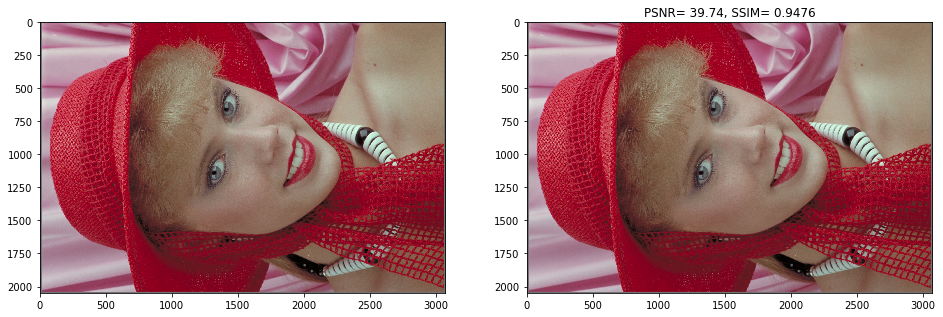

In [9]:
compare_concise(pref, 1, 91)

In [10]:
ratio_ar = 16/((0.64394+0.692909+0.611999)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 24.629935223270365


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 106.24156596925523 , std = 55.50128436770011 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 106.30327473746405 , std = 55.459427920111125 , Max = 255 , Min = 0
size_j= 766707
  psnr= 38.32959740682303 ; ssim= 0.9327465722811841
  size_o= 18874368
  ratio= 24.617445777852556


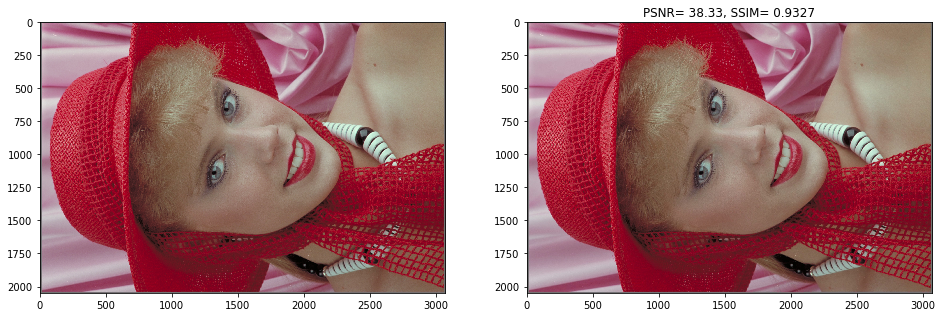

In [11]:
compare_concise(pref, 1, 82)

## 2

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 119.15903176201715 , std = 45.98507624016484 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 119.1483638021681 , std = 45.94000854208361 , Max = 255 , Min = 0
size_j= 1162068
  psnr= 38.69654418485692 ; ssim= 0.942613200125498
  size_o= 18874368
  ratio= 16.24205123968649


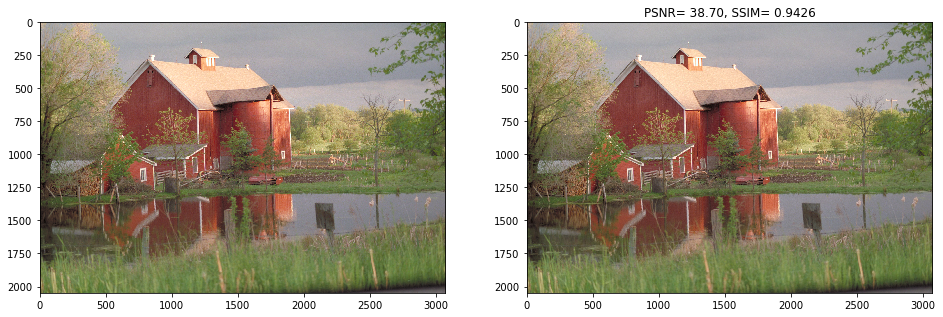

In [12]:
compare_concise(pref, 2, 89)

In [13]:
ratio_ar = 16/((0.604136+0.63112+0.628799)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 25.750313161360584


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 119.15903176201715 , std = 45.98507624016484 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 119.14262819290161 , std = 45.922579502584185 , Max = 255 , Min = 0
size_j= 733777
  psnr= 37.24335211561639 ; ssim= 0.9246799095272809
  size_o= 18874368
  ratio= 25.722212606827416


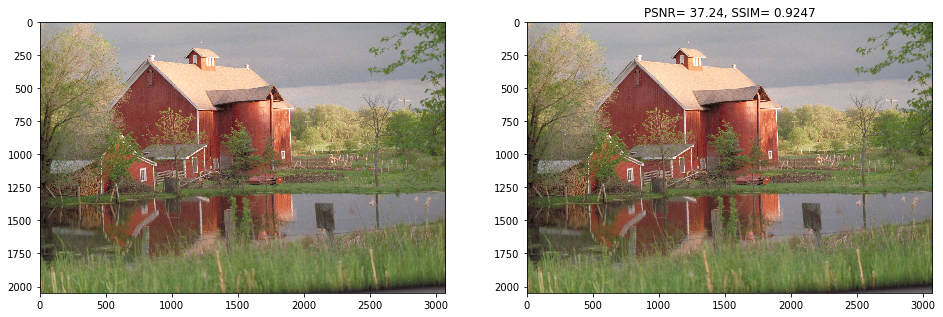

In [14]:
compare_concise(pref, 2, 77)

## 3

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 108.70627980762058 , std = 55.755080567965834 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 108.70355780919392 , std = 55.747546186082154 , Max = 255 , Min = 0
size_j= 1174428
  psnr= 41.65441963963487 ; ssim= 0.9546997797680654
  size_o= 18874368
  ratio= 16.071115470680194


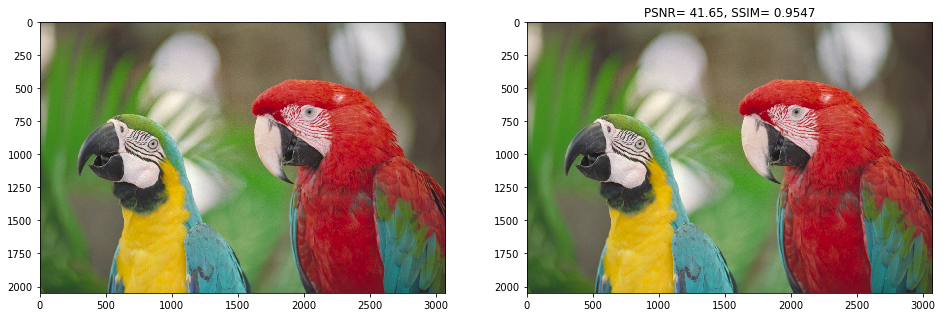

In [15]:
compare_concise(pref, 3, 93)

In [16]:
ratio_ar = 16/((0.661+0.71395+0.6896)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 23.249618560945482


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 108.70627980762058 , std = 55.755080567965834 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 108.72470723258124 , std = 55.74040446748009 , Max = 255 , Min = 0
size_j= 824541
  psnr= 40.75025663511663 ; ssim= 0.9460397576330465
  size_o= 18874368
  ratio= 22.890757403209786


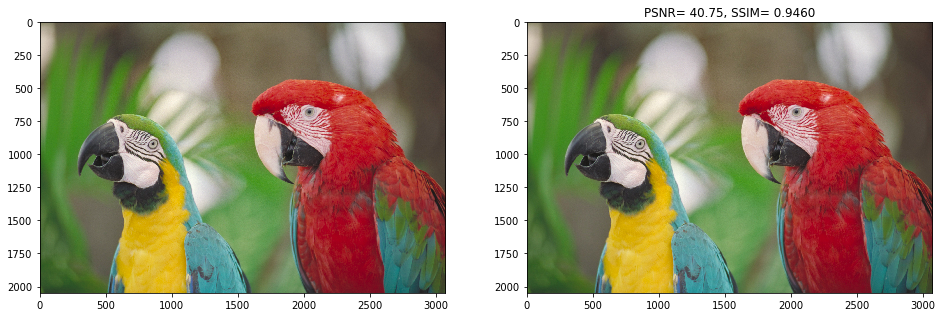

In [17]:
compare_concise(pref, 3, 88)